<h3>Nama : Muh. Azhar Tawakkal</h3>
<h3>NIM : H071201041</h3>
<h3>Kelas : Pengolahan Citra Digital A</h3>

In [301]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage
import skimage.io
import skimage.color as color
import os
from skimage import io
from skimage import color
from scipy import fftpack

#<h1>Nomor 1</h1>

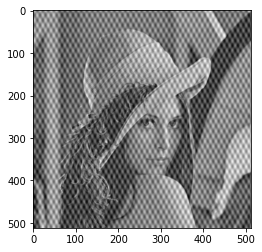

In [302]:
im = np.mean(cv2.imread("/content/lena_priodic2.bmp"), axis=2) / 255
plt.imshow(im, cmap='gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


Text(0.5, 1.0, 'Spectrum Gambar Asli')

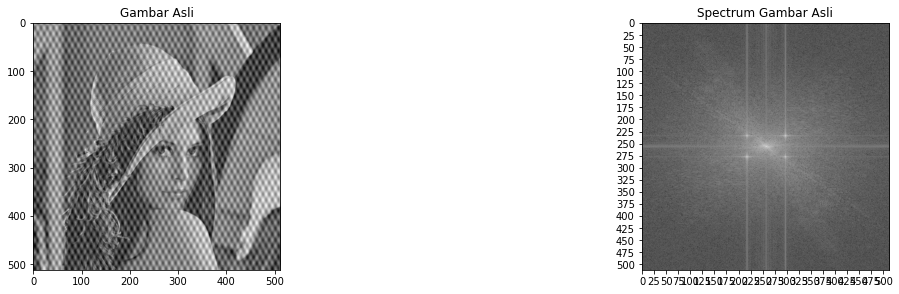

In [303]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1), plt.imshow(im, cmap='gray')
plt.title('Gambar Asli')
F1 = fftpack.fft2((im).astype(float))
F2 = fftpack.fftshift( F1 )

plt.subplot(2,2,2), plt.imshow( (20*np.log10( 0.1 + F2)).astype(int),
cmap=plt.cm.gray)
plt.xticks(np.arange(0, im.shape[1], 25))
plt.yticks(np.arange(0, im.shape[0], 25))
plt.title('Spectrum Gambar Asli')

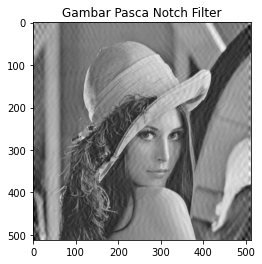

In [304]:
# F2[:254,215:220] = F2[259:,215:220] = F2[:254,293:298] = F2[259:,293:298]= F2[275:280,:251] = F2[275:280,265:] = F2[233:238,:227] = F2[233:238,265:319] = 0
F2[:254,215:220] = F2[259:,215:220] = F2[:254,293:298] = F2[259:,293:298]= F2[275:280,200:235] = F2[275:280,289:319] = F2[233:238,200:227] = F2[233:238,284:319] = 0
im1 = fftpack.ifft2(fftpack.ifftshift( F2 )).real
plt.title('Gambar Pasca Notch Filter')
plt.imshow(im1, cmap='gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


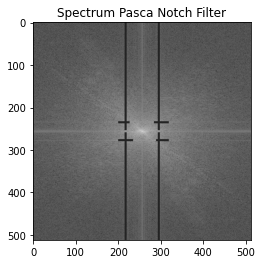

In [318]:
plt.title('Spectrum Pasca Notch Filter')
plt.imshow((20*np.log10( 0.1 + F2)).astype(int), cmap='gray')

#<h1>Nomor 2</h1>

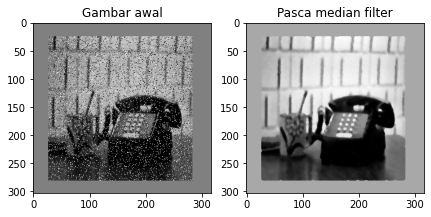

In [306]:
im = cv2.imread("/content/phone_noise.png", 0)
img_med = cv2.medianBlur(im, 5)

plt.figure(figsize=(7,7))

plt.subplot(2,2,1)
plt.title("Gambar awal")
plt.imshow(im, cmap='gray')

plt.subplot(2,2,2)
plt.title("Pasca median filter")
plt.imshow(img_med, cmap='gray')

Text(0.5, 1.0, 'Hasil Prewitt')

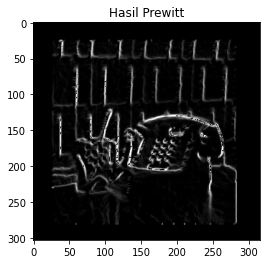

In [307]:
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_med, -1, kernelx)
img_prewitty = cv2.filter2D(img_med, -1, kernely)
plt.imshow(img_prewitty + img_prewittx, cmap='gray')
plt.title('Hasil Prewitt')

#<h1>Nomor 3</h1>

Text(0.5, 1.0, 'Gambar awal')

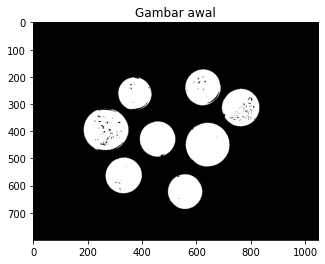

In [331]:
image = cv2.imread("/content/coins-binary.png")
image_r = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image_r,cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")
plt.title("Gambar awal")

Text(0.5, 1.0, 'Mask')

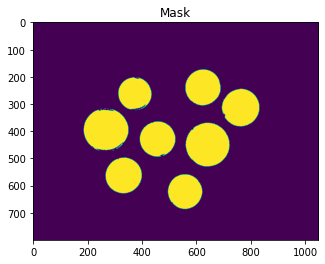

In [332]:
res = cv2.findContours(gray.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = res[-2]

result = np.zeros((800, 1049), np.uint8) #800 dan 1049 ukuran gambar
cv2.fillPoly(result,pts=contours,color=(255,255,255))
plt.figure()
plt.imshow(result)
plt.title("Mask")

Text(0.5, 1.0, 'Hasil')

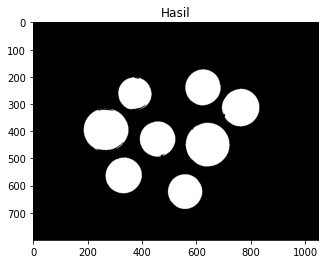

In [333]:
segmented = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(segmented)
plt.title("Hasil")

#<h1>Nomor 4</h1>

Text(0.5, 1.0, 'Gambar awal')

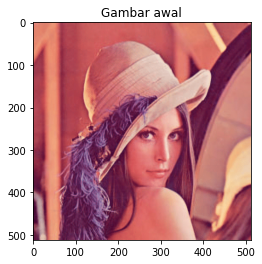

In [312]:
image = cv2.imread("/content/lena-color.tif")
image_r = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_r)
plt.title("Gambar awal")

In [313]:
twoDimage = image_r.reshape((-1,3))
twoDimage = np.float32(twoDimage)

Text(0.5, 1.0, 'Hasil Clustering')

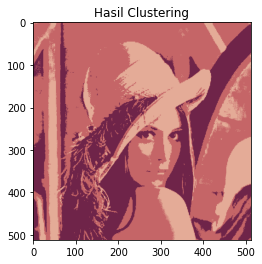

In [314]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.85)
k = 3
ret,label,center=cv2.kmeans(twoDimage,k,None,criteria,3,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((image_r.shape))
plt.imshow(result_image)
plt.title("Hasil Clustering")